In [ ]:
import os
import pathlib
import re
import collections
import scipy.spatial.distance as ds
import pickle
import numpy as np
import random
import string
from string import digits
import pandas as pd
import unicodedata
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import matplotlib.ticker as ticker
from nltk.translate.bleu_score import sentence_bleu
from __future__ import absolute_import, division, print_function
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)
import io
import time
from sklearn.model_selection import train_test_split

2.7.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!tar -xvf  "/content/drive/My Drive/Adv_NLP_Project/dakshina_dataset_v1.0.tar" -C "/content/sample_data/" 
# !tar -xvf  "/content/drive/MyDrive/NLP/Project/Dataset/dakshina_dataset_v1.0.tar" -C "/content/sample_data/"

In [ ]:
l_train = []
l_test = []

f1="/content/sample_data/dakshina_dataset_v1.0/hi/romanized/hi.romanized.rejoined.dev.native.txt"
curr_file1 = open(f1, "r")
for line in curr_file1:
  temp = []
  temp.append(line)
  l_train.append(temp)
curr_file1.close()

f2="/content/sample_data/dakshina_dataset_v1.0/hi/romanized/hi.romanized.rejoined.dev.native.txt"
curr_file2 = open(f2, "r")
i=0
for line in curr_file2:
  l_train[i].append(line)
  i+=1
curr_file2.close()

f3="/content/sample_data/dakshina_dataset_v1.0/hi/romanized/hi.romanized.rejoined.test.native.txt"
curr_file3 = open(f3, "r")
for line in curr_file3:
  temp = []
  temp.append(line)
  l_test.append(temp)
curr_file1.close()

f4="/content/sample_data/dakshina_dataset_v1.0/hi/romanized/hi.romanized.rejoined.test.native.txt"
curr_file4 = open(f4, "r")
i=0
for line in curr_file4:
  l_test[i].append(line)
  i+=1
curr_file2.close()

In [ ]:
print(l_train[:10])
print(l_test[:10])

[['इसके आने से पूर्व ही लोग घरों की सफाई का कार्य शुरू कर देते हैं।\n', 'iske aane se purva hi log gharon ki safai ka karya shuru kar dete hain.\n'], ['विलुप्ति की कगार पर गुणकारी तीखुर\n', 'vilupti ki kagaar par gunkaari tikhur\n'], ['माइकल कामेन (द वॉल के वाद्यमय हिस्सों के लिए एक योगदानकर्ता) ने दोनों के बीच मध्यस्थता की और उस भूमिका को निभाया जिस पर पारंपरिक रूप से रिचर्ड राइट ने कब्जा किया हुआ था जो अब अनुपस्थित थे।\n', 'Michael kamen (the wall ke vadyamaya hisso ke liye ek yogdanakarta) ne dono ke bich madhyasthata ki aur us bhumika ko nibhaya jis par paramparik rup se richard wright ne kabja kiya hua tha jo ab anupasthit the.\n'], ['शाहनामा नौरोज़ के त्यौहार को महान जमशेद के शासनकाल से जोड़ता है।\n', 'shahnama noroj ke tyohaar ko mahaan Jamshed ke shashankaal se jodta hai.\n'], ['मेहरोत्रा, डॉ॰ एन.\n', 'Mehrotra, Dr॰ N.\n'], ['दुर्गा भाभी\n', 'durga bhabhi\n'], ['स्वामी बृहस्पति\n', 'swami brhaspati\n'], ['बॉलीवुड, हिन्दी चलचित्र उद्योग भी मुंबई में ही स्थित है।\n', 'bollywood, 

In [ ]:
df = pd.DataFrame(l_train, columns = ['native', 'roman'])
df

,roman,native
0,इसके आने से पूर्व ही लोग घरों की सफाई का कार्य...,iske aane se purva hi log gharon ki safai ka k...
1,विलुप्ति की कगार पर गुणकारी तीखुर\n,vilupti ki kagaar par gunkaari tikhur\n
2,माइकल कामेन (द वॉल के वाद्यमय हिस्सों के लिए ए...,Michael kamen (the wall ke vadyamaya hisso ke ...
3,शाहनामा नौरोज़ के त्यौहार को महान जमशेद के शास...,shahnama noroj ke tyohaar ko mahaan Jamshed ke...
4,"मेहरोत्रा, डॉ॰ एन.\n","Mehrotra, Dr॰ N.\n"
...,...,...
4995,किन्तु लगता है कि यह मलयालम युक्तिभाषा के बाद ...,kintu lagata hai ki yaha malayalama yuktibhasa...
4996,अक्षांश\n,akshansh\n
4997,"वह लापरवाही से एनामारिया, डेवी जोन्स और अन्य स...","vah laparvahi se enamaria, devi jons aur anya ..."
4998,"""मैं सोचती हूँ कि असली वजह यह थी कि निर्देशक ज...","""main sochti hun ki asli vajah yah thi ki nird..."


In [ ]:
letters_native = [chr(letter) for letter in range(2304, 2432)]
alphabet_size_native = len(letters_native)

letter2ind_native = {'<start>': 0,'<end>' : 1}
for index, letter in enumerate(letters_native):
    letter2ind_native[letter] = index+1

print(letter2ind_native)

{'<start>': 0, '<end>': 1, 'ऀ': 1, 'ँ': 2, 'ं': 3, 'ः': 4, 'ऄ': 5, 'अ': 6, 'आ': 7, 'इ': 8, 'ई': 9, 'उ': 10, 'ऊ': 11, 'ऋ': 12, 'ऌ': 13, 'ऍ': 14, 'ऎ': 15, 'ए': 16, 'ऐ': 17, 'ऑ': 18, 'ऒ': 19, 'ओ': 20, 'औ': 21, 'क': 22, 'ख': 23, 'ग': 24, 'घ': 25, 'ङ': 26, 'च': 27, 'छ': 28, 'ज': 29, 'झ': 30, 'ञ': 31, 'ट': 32, 'ठ': 33, 'ड': 34, 'ढ': 35, 'ण': 36, 'त': 37, 'थ': 38, 'द': 39, 'ध': 40, 'न': 41, 'ऩ': 42, 'प': 43, 'फ': 44, 'ब': 45, 'भ': 46, 'म': 47, 'य': 48, 'र': 49, 'ऱ': 50, 'ल': 51, 'ळ': 52, 'ऴ': 53, 'व': 54, 'श': 55, 'ष': 56, 'स': 57, 'ह': 58, 'ऺ': 59, 'ऻ': 60, '़': 61, 'ऽ': 62, 'ा': 63, 'ि': 64, 'ी': 65, 'ु': 66, 'ू': 67, 'ृ': 68, 'ॄ': 69, 'ॅ': 70, 'ॆ': 71, 'े': 72, 'ै': 73, 'ॉ': 74, 'ॊ': 75, 'ो': 76, 'ौ': 77, '्': 78, 'ॎ': 79, 'ॏ': 80, 'ॐ': 81, '॑': 82, '॒': 83, '॓': 84, '॔': 85, 'ॕ': 86, 'ॖ': 87, 'ॗ': 88, 'क़': 89, 'ख़': 90, 'ग़': 91, 'ज़': 92, 'ड़': 93, 'ढ़': 94, 'फ़': 95, 'य़': 96, 'ॠ': 97, 'ॡ': 98, 'ॢ': 99, 'ॣ': 100, '।': 101, '॥': 102, '०': 103, '१': 104, '२': 105, '३': 106, '४': 107, '५': 108, '

In [ ]:
def preprocess_sentence_roman(w):
    w = w.lower().strip()
    ww = ''
    # Remove all punctuations from the text
    ww += ''.join(ch for ch in w if ch not in string.punctuation)
    # Remove all numbers from text
    remove_digits = str.maketrans('', '', digits)
    ww = ww.translate(remove_digits)
    ww = ww.rstrip().strip()
    # Adding start and end tags
    ww = '@' + ww + '#'
    return ww

def preprocess_sentence_native(w):
    w = w.lower()
    cleaned_line = ''
    # Remove all punctuations from the text
    cleaned_line += ''.join(ch for ch in w if ch not in string.punctuation)
    # Remove all numbers from text
    remove_digits = str.maketrans('', '', digits)
    cleaned_line = cleaned_line.translate(remove_digits)
    cleaned_line = re.sub("[२३०८१५७९४६।–]", "", cleaned_line)
    cleaned_line = cleaned_line.rstrip().strip()
    # Adding start and end tags
    cleaned_line = '@' + cleaned_line + '#'
    return cleaned_line

In [ ]:
def create_dataset(l):
  native_words, native_sents = [], []
  roman_words, roman_sents = [], []

  for i in range(len(df)):
    l[i][0] = preprocess_sentence_native(l[i][0]) # clean native words.
    wordlist1 = l[i][0].split()

    l[i][1] = preprocess_sentence_roman(l[i][1]) # clean roman sentences.
    wordlist2 = l[i][1].split() # clean roman words.

    if len(wordlist1) != len(wordlist2):
      print('Skipping: ',len(wordlist1),len(wordlist2), l[i][0], ' - ', l[i][1])
      continue

    native_words.extend(wordlist1)
    roman_words.extend(wordlist2)

    native_sents.append(wordlist1)
    roman_sents.append(wordlist2)
    
  return [native_words,roman_words], [native_sents, roman_sents]

In [ ]:
train_data, train_sents = create_dataset(l_train)
test_data, test_sents = create_dataset(l_test)

Skipping:  28 27 @तांत्रिक साधक पशु वीर दिव्य भावों के द्वारा महाशक्ति की अर्चना करता हुआ सकल ब्रह्म के शक्तिस्वरूप को अनादि चेतन और आनंदरूप समझकर आत्मविवेक की उपलब्धि करता है#  -  @tantrik sadhak pashu veer divya bhawon ke dwara mahashakti ki archana karata hua sakal bramh ke shaktiswaroop ko chetan aur aanandrup samajkar aatmvivek ki uplabdhi karta hai#
Skipping:  22 21 @अतीत में भौतिक कागज का विनिमय होता था और इसमें एक चॅक के समाशोधन में पांच व्यावसायिक दिन तक लग जाते थे#  -  @ateet men bhautik kagaj ka winimay hota tha aur ismeanek chak ke samashodhan men panch vyavasayik din tak lag jaate the#
Skipping:  16 15 @डॉ॰ वी पी मिरांशी के अनुसार वाकाटक वंश का सर्वश्रेष्ठ राजा विन्ध्यशक्ति का पुत्र प्रवरसेन था#  -  @dr vp  miranshi ke anusar vakatak vansh ka sarvashrestha raja vindhyasakti ka putra pravarasena tha#
Skipping:  16 15 @वही परमात्मा सर्जन की इच्छा से अव्यक्त में प्रविष्ट होकर महत् तत्व की रचना करता है#  -  @vahi parmatma sarjan ki ichcha se avyakt mein pravisht hokar mahattva

In [ ]:
train_data[0][:10],train_data[1][:10]

(['@इसके', 'आने', 'से', 'पूर्व', 'ही', 'लोग', 'घरों', 'की', 'सफाई', 'का'],
 ['@iske', 'aane', 'se', 'purva', 'hi', 'log', 'gharon', 'ki', 'safai', 'ka'])

In [ ]:
test_data[0][:10],test_data[1][:10]

(['@कुंभ',
  'राशि',
  'में',
  'जन्मे',
  'लोग',
  'संभावनाओं',
  'से',
  'भरी',
  'एक',
  'जगह'],
 ['@kumbh',
  'rashi',
  'men',
  'janme',
  'log',
  'sambhavnaon',
  'se',
  'bhari',
  'ek',
  'jagah'])

In [ ]:
len(test_data[0]),len(test_data[1]),len(train_data[0]),len(train_data[1])

(85161, 85161, 86526, 86526)

Combine the test and train data. So that we can split train and test set according to our needs.

In [ ]:
train_data[0].extend(test_data[0])
train_data[1].extend(test_data[1])

print(len(train_data[0]),len(train_data[1]))

171687 171687


In [ ]:
train_data[0][-1],train_data[1][-1]

('मल्होत्रा#', 'malhotra#')

In [ ]:
len(train_data[0]),len(train_data[1])

(171687, 171687)

In [ ]:
# storing word2index and index2word mappings for both language.
class WordIndex():
  def __init__(self, lang):
    self.lang = lang
    self.word2idx = {}
    self.idx2word = {}
    self.vocab = set()
    
    self.create_index()
    
  def create_index(self):
    for phrase in self.lang:
      for l in phrase:
        self.vocab.update(l)
    
    self.vocab = sorted(self.vocab)
    
    self.word2idx['<pad>'] = 0
    for index, word in enumerate(self.vocab):
      self.word2idx[word] = index + 1
    
    for word, index in self.word2idx.items():
      self.idx2word[index] = word

Helper functions to create Lang vocab and tensors from words.

In [ ]:
def max_length(tensor):
    return max(len(t) for t in tensor)

def load_dataset(pairs):

    # index language using the class defined above    
    inp_lang = WordIndex(pairs[0])
    targ_lang = WordIndex(pairs[1])
    
    # Vectorize the input and target languages
    
    # words in roman (eng)
    input_tensor = [[inp_lang.word2idx[s] for s in en] for en in pairs[0]]
    
    # words in native (hin)
    target_tensor = [[targ_lang.word2idx[s] for s in hn] for hn in pairs[1]]
    
    # Calculate max_length of input and output tensor
    # Here, we'll set those to the longest sentence in the dataset
    max_length_inp, max_length_tar = max_length(input_tensor), max_length(target_tensor)
    
    # Padding the input and output tensor to the maximum length
    input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor, 
                                                                 maxlen=max_length_inp,
                                                                 padding='post')
    
    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, 
                                                                  maxlen=max_length_tar, 
                                                                  padding='post')
    
    return input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_tar

In [ ]:
input_tensor, target_tensor, inp_lang, targ_lang, max_length_inp, max_length_targ = load_dataset(train_data)

In [ ]:
print(len(input_tensor),len(target_tensor))

171687 171687


Function to convert tensor to word and print.

In [ ]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.idx2word[t]))

In [ ]:
convert(inp_lang,input_tensor[-1])
convert(targ_lang,target_tensor[-1])

70 ----> म
73 ----> ल
96 ----> ्
80 ----> ह
94 ----> ो
60 ----> त
96 ----> ्
72 ----> र
82 ----> ा
1 ----> #
15 ----> m
3 ----> a
14 ----> l
10 ----> h
17 ----> o
22 ----> t
20 ----> r
3 ----> a
1 ----> #


Train and Test split.

In [ ]:
input_tensor = input_tensor[:200000]
target_tensor = target_tensor[:200000]
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.25)

# Show length
len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val)

(128765, 128765, 42922, 42922)

Some hyper-parameters.

In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 256
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
val_steps_per_epoch = len(input_tensor_val)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word2idx)+1
vocab_tar_size = len(targ_lang.word2idx)+1

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
val_dataset = tf.data.Dataset.from_tensor_slices((input_tensor_val, target_tensor_val))
val_dataset = val_dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([256, 32]), TensorShape([256, 35]))

Let's build the model.
The encoder : it will consume input and produce a thought vector which will be the input of the decoder.

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.norm = tf.keras.layers.LayerNormalization()
    self.layer = tf.keras.layers.Dropout(.1)
    self.LSTM = tf.keras.layers.LSTM(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform',
                                   trainable=True)

  def call(self, x):
    embedding = self.embedding(x)
    outputs, hidden, cell = self.LSTM(embedding)
    return hidden, cell



In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden, sample_cell = encoder(example_input_batch)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_cell.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (256, 1024)
Encoder Hidden state shape: (batch size, units) (256, 1024)


The decoder : calculates the probablity of next character by taking encoder input.

In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)
    self.layer = tf.keras.layers.Dropout(.1)
    self.norm = tf.keras.layers.LayerNormalization()
    self.LSTM = tf.keras.layers.LSTM(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform', trainable=True)
    #self.relu = tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)

  def call(self, x, hid_state, cell):

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.layer(self.embedding(x))
    #print(x.shape, self.dec_units, hid_state.shape)
    encoder_test_states = [hid_state, cell]
    output, state, cell = self.LSTM(x, initial_state=encoder_test_states)
    #print(cell.shape)
    prediction = self.fc(output)
    return prediction, state, cell

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)
print(sample_hidden.shape, sample_cell.shape)
sample_decoder_output, _, _ = decoder(tf.random.uniform((256, 1)), sample_hidden, sample_cell)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

(256, 1024) (256, 1024)
Decoder output shape: (batch_size, vocab size) (256, 1, 45)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
loss_object = tf.keras.losses.CategoricalCrossentropy( from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

Adding checkpoints to store the model.

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

Training step function.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
loss_object = tf.keras.losses.SparseCategoricalCrossentropy( from_logits=True, reduction='none')

In [ ]:
@tf.function
def train_step(inp, targ):
  loss = 0

  with tf.GradientTape() as tape:
    state, cell = encoder(inp)

    dec_state = state

    dec_input = tf.expand_dims([targ_lang.word2idx['@']] * BATCH_SIZE, 1)
    outputs = []
    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_state, cell = decoder(dec_input, dec_state, cell)
      outputs.append(predictions)

      #loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

    outputs = tf.stack(outputs)
    outputs = tf.squeeze(outputs,2)
    outputs = tf.transpose(outputs, [1,0,2])
    temp_targ = targ[:,1:targ.shape[1]]
    temp_targ = tf.expand_dims(temp_targ, axis=2)
    loss = loss_object(temp_targ, outputs)
  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
@tf.function
def val_step(inp, targ):
    loss = 0
    state, cell = encoder(inp)

    dec_state = state

    dec_input = tf.expand_dims([targ_lang.word2idx['@']] * BATCH_SIZE, 1)
    outputs = []
    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
        # passing enc_output to the decoder
        predictions, dec_state, cell = decoder(dec_input, dec_state, cell)
        outputs.append(predictions)

        #loss += loss_function(targ[:, t], predictions)

        # using teacher forcing
        dec_input = tf.expand_dims(targ[:, t], 1)

    outputs = tf.stack(outputs)
    outputs = tf.squeeze(outputs,2)
    outputs = tf.transpose(outputs, [1,0,2])
    temp_targ = targ[:,1:targ.shape[1]]
    temp_targ = tf.expand_dims(temp_targ, axis=2)
    loss = loss_object(temp_targ, outputs)
    batch_loss = (loss / int(targ.shape[1]))

    return batch_loss

In [ ]:
print(len(dataset.take(steps_per_epoch)))

502


Training loop

In [ ]:
EPOCHS = 20
loss_values = []
val_loss_values = []

for epoch in range(EPOCHS):
    start = time.time()

    #enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0
    val_total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ)
        total_loss += batch_loss

    for (batch, (inp, targ)) in enumerate(val_dataset.take(val_steps_per_epoch)):
        val_batch_loss = val_step(inp, targ)
        val_total_loss += val_batch_loss

    if batch % 100 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                     batch,
                                                     batch_loss.numpy()))
    # saving (checkpoint) the model every 2 epochs
    if (epoch + 1) % 2 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)
  
    ep_loss = total_loss/steps_per_epoch
    loss_values.append( tf.math.reduce_sum(ep_loss))
    val_ep_loss = val_total_loss/val_steps_per_epoch
    val_loss_values.append( tf.math.reduce_sum(val_ep_loss))

    print('Epoch {} Train Loss {:.4f} Val Loss {:.4f}'.format(epoch + 1, tf.math.reduce_sum(ep_loss),tf.math.reduce_sum(val_ep_loss)))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

In [ ]:
print(tf.math.reduce_sum(ep_loss))

tf.Tensor(11.194823, shape=(), dtype=float32)


In [ ]:
fin_loss_values = []
for i in loss_values :
    print( tf.math.reduce_sum(i))
    fin_loss_values.append( tf.math.reduce_sum(i))

tf.Tensor(83.471794, shape=(), dtype=float32)
tf.Tensor(37.73526, shape=(), dtype=float32)
tf.Tensor(21.639324, shape=(), dtype=float32)
tf.Tensor(16.245232, shape=(), dtype=float32)
tf.Tensor(13.521946, shape=(), dtype=float32)
tf.Tensor(12.213117, shape=(), dtype=float32)
tf.Tensor(11.694338, shape=(), dtype=float32)
tf.Tensor(11.360147, shape=(), dtype=float32)
tf.Tensor(11.221128, shape=(), dtype=float32)
tf.Tensor(11.126045, shape=(), dtype=float32)
tf.Tensor(11.148183, shape=(), dtype=float32)
tf.Tensor(10.971771, shape=(), dtype=float32)
tf.Tensor(10.985806, shape=(), dtype=float32)
tf.Tensor(11.03358, shape=(), dtype=float32)
tf.Tensor(10.973411, shape=(), dtype=float32)
tf.Tensor(10.993552, shape=(), dtype=float32)
tf.Tensor(11.006184, shape=(), dtype=float32)
tf.Tensor(11.10872, shape=(), dtype=float32)
tf.Tensor(11.251514, shape=(), dtype=float32)
tf.Tensor(11.194823, shape=(), dtype=float32)


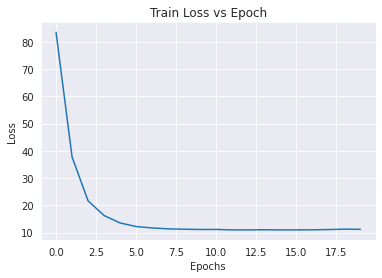

In [ ]:
plt.plot(fin_loss_values)
plt.title('Train Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
fin_val_loss_values = []
for i in val_loss_values :
    print( tf.math.reduce_sum(i))
    fin_val_loss_values.append( tf.math.reduce_sum(i))

tf.Tensor(55.00875, shape=(), dtype=float32)
tf.Tensor(27.328793, shape=(), dtype=float32)
tf.Tensor(18.529135, shape=(), dtype=float32)
tf.Tensor(15.711255, shape=(), dtype=float32)
tf.Tensor(14.373295, shape=(), dtype=float32)
tf.Tensor(13.803789, shape=(), dtype=float32)
tf.Tensor(13.626005, shape=(), dtype=float32)
tf.Tensor(13.535666, shape=(), dtype=float32)
tf.Tensor(13.405974, shape=(), dtype=float32)
tf.Tensor(13.404148, shape=(), dtype=float32)
tf.Tensor(13.328728, shape=(), dtype=float32)
tf.Tensor(13.233696, shape=(), dtype=float32)
tf.Tensor(13.270341, shape=(), dtype=float32)
tf.Tensor(13.480684, shape=(), dtype=float32)
tf.Tensor(13.3746, shape=(), dtype=float32)
tf.Tensor(13.551226, shape=(), dtype=float32)
tf.Tensor(13.266811, shape=(), dtype=float32)
tf.Tensor(13.57432, shape=(), dtype=float32)
tf.Tensor(13.586222, shape=(), dtype=float32)
tf.Tensor(13.39279, shape=(), dtype=float32)


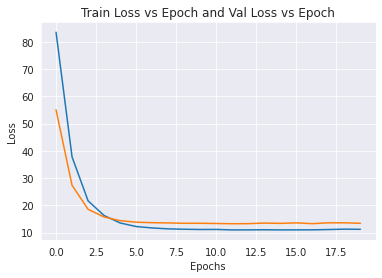

In [ ]:
plt.plot(fin_loss_values)
plt.plot(fin_val_loss_values)
plt.title('Train Loss vs Epoch and Val Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
!zip -r /content/checkpoints.zip /content/training_checkpoints

  adding: content/training_checkpoints/ (stored 0%)
  adding: content/training_checkpoints/ckpt-9.data-00000-of-00001 (deflated 7%)
  adding: content/training_checkpoints/ckpt-4.data-00000-of-00001 (deflated 7%)
  adding: content/training_checkpoints/ckpt-2.data-00000-of-00001 (deflated 7%)
  adding: content/training_checkpoints/ckpt-9.index (deflated 55%)
  adding: content/training_checkpoints/ckpt-7.data-00000-of-00001 (deflated 7%)
  adding: content/training_checkpoints/ckpt-1.index (deflated 55%)
  adding: content/training_checkpoints/ckpt-4.index (deflated 55%)
  adding: content/training_checkpoints/ckpt-3.data-00000-of-00001 (deflated 7%)
  adding: content/training_checkpoints/ckpt-10.data-00000-of-00001 (deflated 7%)
  adding: content/training_checkpoints/ckpt-6.index (deflated 55%)
  adding: content/training_checkpoints/ckpt-2.index (deflated 55%)
  adding: content/training_checkpoints/ckpt-3.index (deflated 55%)
  adding: content/training_checkpoints/ckpt-8.index (deflated 55%

In [ ]:
# !cp -r training_checkpoints /content/drive/MyDrive/NLP/Project/outputs/
!cp -r checkpoints.zip /content/drive/MyDrive/Adv_NLP_Project/

### Evaluation

In [ ]:
def evaluate(sentence):
    #attention_plot = np.zeros((max_length_targ, max_length_inp))

    sentence = preprocess_sentence_native(sentence)

    inputs = [inp_lang.word2idx[i] for i in sentence]

    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_inp,
                                                           padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    enc_states, cells = encoder(inputs)

    dec_states = enc_states
    dec_input = tf.expand_dims([targ_lang.word2idx['@']], 0)

    for t in range(max_length_targ):
        predictions, dec_states, cells = decoder(dec_input, dec_states, cells)
        #print("pred :", predictions.shape)
        predicted_id = tf.argmax(predictions[0][0]).numpy()
        #print("pd :", predicted_id.shape)

        result += targ_lang.idx2word[predicted_id] + ' '

        if targ_lang.idx2word[predicted_id] == '#':
            return result, sentence

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence

In [ ]:
def transliterate(sentence):
    # print("Input: ", sentence)
    all_words = sentence.split()
    final_result = ""
    for word in all_words:
        result, word = evaluate(word)
        temp = "".join(result.split(" "))+" "
        temp = temp.replace("<pad>", "")
        final_result+=temp
    # print("Output: ", final_result)
    return final_result

In [ ]:
from tqdm.notebook import tqdm

def calc_accuracy(test_data, n):
    correct = 0
    for i in tqdm(range(len(test_data[0][:n]))):
        hindi, eng = test_data[0][i], test_data[1][i]

        res, _ = evaluate(hindi)
        res = ''.join(res.split(' '))

        # print(res,eng)
        
        eng = eng.replace("@", "")
        eng = eng.replace("#", "")
        res = res.replace("@", "")
        res = res.replace("#", "")

        # print(eng, res)
        if eng == res:
            # print("Yes\n")
            correct += 1

    # accuracy = correct / len(test_data[0])
    accuracy = correct / n
    return accuracy

In [ ]:
acc = calc_accuracy(test_data, 10)
print("Accuracy on 10 test words:", acc, "\n")

acc = calc_accuracy(test_data, 100)
print("Accuracy on 100 test words:", acc, "\n")

acc = calc_accuracy(test_data, 500)
print("Accuracy on 500 test words:", acc, "\n")

acc = calc_accuracy(test_data, 1000)
print("Accuracy on 1000 test words:", acc, "\n")

acc = calc_accuracy(test_data, 5000)
print("Accuracy on 5000 test words:", acc, "\n")

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy on 10 test words: 0.7 



  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy on 100 test words: 0.51 



  0%|          | 0/500 [00:00<?, ?it/s]

Accuracy on 500 test words: 0.434 



  0%|          | 0/1000 [00:00<?, ?it/s]

Accuracy on 1000 test words: 0.415 



  0%|          | 0/5000 [00:00<?, ?it/s]

Accuracy on 5000 test words: 0.4224 



In [ ]:
from nltk.translate.bleu_score import SmoothingFunction

def calc_bleu(test_sens, n):
    blue_score = 0

    for i in range(len(test_sens[0][:n])):
        inp_sent, trg_sent = test_sens[0][i], test_sens[1][i]

        res = ""
        for i in inp_sent:
            res += i+" "
        res = transliterate(res)

        tmp = ""
        for i in trg_sent:
            tmp += i+" "
        trg_sent = tmp
        trg_sent = trg_sent.replace("@", "")
        trg_sent = trg_sent.replace("#", "")
        res = res.replace("@", "")
        res = res.replace("#", "")

        reference = [trg_sent.split()]
        candidate = res.split()

        smoothie = SmoothingFunction().method4
        blue_score += sentence_bleu(reference, candidate, smoothing_function=smoothie)
    
    if (len(test_sens[0][:n])!=0):
        return blue_score / len(test_sens[0][:n])

In [ ]:
def calc_rouge(test_sents, n):
    precision, recall, f1score = 0, 0, 0
    scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)
    
    for i in range(len(test_sents[0][:n])):
        inp_sent, reference = test_sents[0][i], test_sents[1][i]

        res = ""
        for i in inp_sent:
            res += i+" "
        res = transliterate(res)

        tmp = ""
        for i in reference:
            tmp += i+" "
        reference = tmp
        candidate = res.replace("@", "")
        candidate = res.replace("#", "")
        reference = reference.replace("@", "")
        reference = reference.replace("#", "")
        
        tmp_p, tmp_r, tmp_f = scorer.score(reference, candidate)['rouge1']
        precision += tmp_p
        recall += tmp_r
        f1score += tmp_f

    precision /= len(test_sents[0][:n])
    recall /= len(test_sents[0][:n])
    f1score /= len(test_sents[0][:n])
    
    return (precision, recall, f1score)

In [ ]:
bleu = calc_bleu(test_sents, 1000)
print("Bleu score on 1000 test sentences:", bleu, "\n")
rouge = calc_rouge(test_sents, 1000)
print("Rouge score on 1000 test sentences:", rouge, "\n")

Bleu score on 1000 test sentences: 0.22525991214632998 

Rouge score on 1000 test sentences: (0.4387891778934867, 0.4387891778934867, 0.4387891778934867) 



### Testing on various input words


In [ ]:
transliterate('संस्थागत')

Input:  संस्थागत
Output:  sansthaar# 


'sansthaar# '

In [ ]:
transliterate('गुणदोषों')

Input:  गुणदोषों
Output:  guandarashon# 


'guandarashon# '

In [ ]:
transliterate('कायदा')

Input:  कायदा
Output:  yadayaa 


'yadayaa '

In [ ]:
transliterate('ऐडसेंस')

Input:  ऐडसेंस
Output:  edcems# 


'edcems# '

In [ ]:
transliterate('वाम')

Input:  वाम
Output:  vam# 


'vam# '

In [ ]:
transliterate('इसके आने से पूर्व ही लोग घरों की सफाई का कार्य शुरू कर देते हैं।') 
print()
transliterate('शाहनामा नौरोज़ के त्यौहार को महान जमशेद के शासनकाल से जोड़ता है।')
print()
transliterate('सारे लहलहाते खेत, पेड़-पौधे, महल और झोपड़ियाँ- सब की सब उजड़ जाएँगी।')
print()
transliterate('माना जाता है की मरीज की अपनी ही प्रतिरक्षा प्रणाली के क्षति की जाती है।')
print()
transliterate('इस युद्ध में राणा सांगा का साथ महमूद लोदी दे रहे थे।')

'is# yuddh# men# rana# sanga# ka# saath# mahmud# loydi# de# rahe# the# '

In [ ]:
result=[]
for i in range(len(l_test)):
    if(i==100):
        break
    output = transliterate(l_test[i][0])
    temp = [l_test[i][0],output,l_test[i][1]]
    result.append(temp)

In [ ]:
res = pd.DataFrame(result, columns = ['input', 'output', 'expected'])
res

,input,output,expected
0,@कुंभ राशि में जन्मे लोग संभावनाओं से भरी एक ज...,kumbh# rashi# men# janmen# loga# manbhavanaon ...,@kumbh rashi men janme log sambhavnaon se bhar...
1,@इसका उलट भी सत्य है#,iskaa# ulta# bhi# satya# ha#,@iska ulat bhi satya hai#
2,@कुछ देवता जो मुख्यत नगर देवता थे अपने संप्रदा...,kuch# devata jo# mushaakt# nagar# devata the# ...,@kuch devta jo mukhyatah nagar devta the apne ...
3,@तेल के उत्पादन में संसार में रोमानिया का छठा ...,tel# ken# uptapan# men# sansar# men# romania k...,@tel ke utpadan men sansar men romania ka chha...
4,@बनारसी लाल से मिलकर पुलिस ने सारा भेद प्राप्त...,banasari# lal# se# milakar# pusili# ne# sara# ...,@banarasi lal se milkar police ne sara bhed pr...
...,...,...,...
95,@जिसके कारण हृदपेशीविकृति या अतालता हो सकती है#,jiske# karan# heernevretikrishin ya# atalta# h...,@jiske karan hrdapeshivikriti ya atalata ho sa...
96,@उत्तर प्रदेश विधान सभा चुनाव में इन्होंने उत्...,uttar pradesha# vidhan# sabhaar chunava# men# ...,@uttar pradesh vidhan sabha chunav men inhone ...
97,@नेपाली उपन्यास का आधारहरू नेपाली भाषा के विख्...,nepali# upanyas# ka# adharurah# nepali# bhasha...,@nepali upanyas ka shadharhu nepali bhasha ke ...
98,@लेकिन मगही साहित्येतिहासकारों के अनुसार मगही ...,lekin# magahi# sagethyakariyo# ken# anusara# m...,@lekin maghi sahityetihaskaron ke anusar maghi...


In [ ]:
res.to_csv('file1.csv')